# Определение выгодного тарифа для телеком компании

**Описание проекта**

Клиентам оператора сотовой связи предлагают два тарифных плана: «Смарт» и «Ультра». Для корректировки рекламного бюджета требуется выяснить, какой тариф приносит больше денег. Предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. Имеются данные 500 клиентов за 2018 год. 

**Задача проекта**

На основе данных клиентов оператора сотовой связи проанализировать поведение клиентов и поиск оптимального тарифа

**Описание тарифов**

*Тариф «Смарт»*
1. Ежемесячная плата: 550 рублей
2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
- минута разговора: 3 рубля
- сообщение: 3 рубля
- 1 Гб интернет-трафика: 200 рублей

*Тариф «Ультра»*
1. Ежемесячная плата: 1950 рублей
2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
- минута разговора: 1 рубль
- сообщение: 1 рубль
- 1 Гб интернет-трафика: 150 рублей

**Описание данных**

Таблица users (информация о пользователях):
- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tariff — название тарифного плана

Таблица calls (информация о звонках):
- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок

Таблица messages (информация о сообщениях):
- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение

Таблица internet (информация об интернет-сессиях):
- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя

Таблица tariffs (информация о тарифах):
- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта) 

**План работы**

1. Загрузка данных и изучение общей информации 
2. Предобработка данных(приведение к нужному типу, исправление ошибок)
3. Проведение расчетов 
4. Проверка гипотез
5. Подведение итогов исследования 

## Загрузка данных и изучение общей информации

### Знакомство с данными

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#информация о звонках
df_calls = pd.read_csv('C:/Users/OT/Desktop/проекты/Тарифы/calls.csv')
df_calls.head(10)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [3]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Пропущенных значений нет. Четыре столбца, три типа данных. Изменить тип в столбце call_date.

In [4]:
#информация об интернет-сессиях
df_internet = pd.read_csv('C:/Users/OT/Desktop/проекты/Тарифы/internet.csv')
df_internet.head(10)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


In [5]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Пропущенных значений нет. Пять столбцов, три типа данных. Изменить тип данных в столбце session_date.

In [6]:
#информация о сообщениях
df_messages = pd.read_csv('C:/Users/OT/Desktop/проекты/Тарифы/messages.csv')
df_messages.head(10)  

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [7]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Пропущенных значений нет. Три столбца, два типа данных. Изменить тип в столбце message_date.

In [8]:
#информация о тарифах
df_tariffs = pd.read_csv('C:/Users/OT/Desktop/проекты/Тарифы/tariffs.csv')
df_tariffs 

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [9]:
df_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Пропущенных значений нет. Восемь столбцов, два типа данных. 

In [10]:
#информация о пользователях
df_users = pd.read_csv('C:/Users/OT/Desktop/проекты/Тарифы/users.csv')
df_users.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


In [11]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Пропущены значения в столбце churn_date. Восемь столбцов, два типа данных. Изменить тип данных в столбцах churn_date и reg_date. 

### Вывод 

Пропущены значения только в столбце churn_date файла с данными о пользователях. Согласно описанию данных, это означает, что тариф еще действовал на момент выгрузки данных. Оставим здесь пропуски, т.к. в анализе они не участвуют. Необходимо изменить тип данных в датах. Присутствуют звонки с нулевой продолжительностью. Необходимо округлить время звонков и объем трафика в большую сторону в соответствии с условиями тарифов.

## Предобработка данных

### Изменение типов данных

Изменим тип данных во всех датах:

In [12]:
df_calls['call_date']=pd.to_datetime(df_calls['call_date'],format='%Y-%m-%d')
df_internet['session_date']=pd.to_datetime(df_internet['session_date'],format='%Y-%m-%d')
df_messages['message_date']=pd.to_datetime(df_messages['message_date'],format='%Y-%m-%d')
df_users['churn_date']=pd.to_datetime(df_users['churn_date'],format='%Y-%m-%d')
df_users['reg_date']=pd.to_datetime(df_users['reg_date'],format='%Y-%m-%d')

Округлим время звонков:

In [13]:
df_calls['duration'] = np.ceil(df_calls['duration'])

Добавим столбец с месяцем в таблицы:

In [14]:
df_calls['month'] = pd.DatetimeIndex(df_calls['call_date']).month
df_internet['month'] = pd.DatetimeIndex(df_internet['session_date']).month
df_messages['month'] = pd.DatetimeIndex(df_messages['message_date']).month
df_users['month'] = pd.DatetimeIndex(df_users['reg_date']).month

### Сводные таблицы

Сделаем сводные по звонкам, сообщениям и интернет-трафику:

In [15]:
#звонки
month_calls = df_calls.pivot_table(index=['user_id', 'month'],values='duration',aggfunc=('sum'))
month_calls

duration
user_id month          
1000    5         159.0
        6         172.0
        7         340.0
        8         408.0
        9         466.0
...                 ...
1498    10        247.0
1499    9          70.0
        10        449.0
        11        612.0
        12        492.0

[3174 rows x 1 columns]

In [16]:
#сообщения
month_messages = df_messages.pivot_table(index=['user_id','month',],values='message_date',aggfunc=('count'))
month_messages

message_date
user_id month              
1000    5                22
        6                60
        7                75
        8                81
        9                57
...                     ...
1498    10               42
1499    9                11
        10               48
        11               59
        12               66

[2717 rows x 1 columns]

In [17]:
#интернет-трафик
month_internet = df_internet.pivot_table(index=['user_id','month'],values='mb_used',aggfunc=('sum'))
month_internet

mb_used
user_id month          
1000    5       2253.49
        6      23233.77
        7      14003.64
        8      14055.93
        9      14568.91
...                 ...
1498    10     20579.36
1499    9       1845.75
        10     17788.51
        11     17963.31
        12     13055.58

[3203 rows x 1 columns]

Объединим сводные в рабочую таблицу:

In [18]:
messages_calls = month_messages.merge(month_calls,on=['user_id','month'],how='outer') #звонки и сообщения 
data = messages_calls.merge(month_internet,on=['user_id','month'],how='outer')#звонки-смс-интернет
data.rename(columns={'message_date': 'sms','duration': 'calls', 'mb_used':'traffic'}, inplace=True)#переименуем два столбца
data = data.reset_index().merge(df_users[['city', 'user_id', 'tariff']], on='user_id', how='outer')#рабочая таблица
data

,user_id,month,sms,calls,traffic,city,tariff
0,1000,5.0,22.0,159.0,2253.49,Краснодар,ultra
1,1000,6.0,60.0,172.0,23233.77,Краснодар,ultra
2,1000,7.0,75.0,340.0,14003.64,Краснодар,ultra
3,1000,8.0,81.0,408.0,14055.93,Краснодар,ultra
4,1000,9.0,57.0,466.0,14568.91,Краснодар,ultra
...,...,...,...,...,...,...,...
3211,1494,10.0,NaN,354.0,17767.24,Омск,smart
3212,1494,11.0,NaN,411.0,18052.45,Омск,smart
3213,1494,12.0,NaN,418.0,17621.21,Омск,smart
3214,1128,NaN,NaN,NaN,NaN,Волжский,ultra


Проверим данные о пользователях 1128 и 1371 (у них NaN во всех ключевых столбцах):

In [19]:
df_calls.query('user_id == 1128')

,id,call_date,duration,user_id,month


In [20]:
df_internet.query('user_id == 1128')

,Unnamed: 0,id,mb_used,session_date,user_id,month


In [21]:
df_messages.query('user_id == 1128')

,id,message_date,user_id,month


In [22]:
df_users.query('user_id == 1128')

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month
128,1128,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra,12


In [23]:
df_calls.query('user_id == 1371')

,id,call_date,duration,user_id,month


In [24]:
df_internet.query('user_id == 1371')

,Unnamed: 0,id,mb_used,session_date,user_id,month


In [25]:
df_messages.query('user_id == 1371')

,id,message_date,user_id,month


In [26]:
df_users.query('user_id == 1371')

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month
371,1371,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart,12


Проверили данные об этих пользователях по всем файлам. Они оба зарегистрированы в декабре,нам о них известно только из данных о пользователях. Вероятно, они не пользовались услугами связи. Поэтому считаем возможным удалить эти строки.

In [27]:
data = data.drop(index=[3214])
data = data.drop(index=[3215])
data = data.reset_index(drop=True)

In [28]:
data.isna().sum()#сколько теперь пропусков

user_id      0
month        0
sms        497
calls       40
traffic     11
city         0
tariff       0
dtype: int64

In [29]:
df_nan_sms = data[data['sms'].isna()]
df_nan_sms['user_id'].unique()#90 пользователей

array([1036, 1041, 1051, 1090, 1109, 1159, 1198, 1263, 1279, 1287, 1340,
       1384, 1389, 1413, 1439, 1455, 1458, 1476, 1001, 1006, 1010, 1017,
       1024, 1040, 1049, 1053, 1063, 1078, 1085, 1095, 1101, 1107, 1114,
       1116, 1117, 1118, 1120, 1129, 1132, 1143, 1152, 1153, 1157, 1162,
       1175, 1177, 1179, 1185, 1195, 1201, 1204, 1208, 1210, 1220, 1224,
       1225, 1228, 1240, 1242, 1248, 1254, 1255, 1260, 1290, 1291, 1292,
       1297, 1301, 1305, 1306, 1322, 1334, 1339, 1360, 1363, 1367, 1370,
       1376, 1388, 1397, 1428, 1429, 1435, 1442, 1456, 1462, 1466, 1469,
       1479, 1494], dtype=int64)

In [30]:
df_nan_calls = data[data['calls'].isna()]
df_nan_calls['user_id'].value_counts()#8 пользователей

1106    9
1091    8
1231    8
1473    5
1489    5
1328    3
1373    1
1476    1
Name: user_id, dtype: int64

In [31]:
df_nan_internet = data[data['traffic'].isna()]
df_nan_internet['user_id'].value_counts()#4 пользователя

1273    8
1377    1
1392    1
1446    1
Name: user_id, dtype: int64

В результате объдинения данных из изначальных таблиц исчезли данные из отдельных столбцов по разным пользователям. Т.к. совпадений по users_id нет, не будем удалять эти строки, а пропуски заменим на 0. 

In [32]:
data['sms'] = data['sms'].fillna(0)
data['calls']= data['calls'].fillna(0)
data['traffic'] = data['traffic'].fillna(0)
data.isna().sum()

user_id    0
month      0
sms        0
calls      0
traffic    0
city       0
tariff     0
dtype: int64

Добавим информацию о тарифах:

In [33]:
df_tariffs.rename(columns={'tariff_name': 'tariff'}, inplace=True)#переименуем столбец, чтобы объединить по нему
data_final = data.merge(df_tariffs, on=['tariff'], how='outer')
data_final.head(5)

,user_id,month,sms,calls,traffic,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5.0,22.0,159.0,2253.49,Краснодар,ultra,1000,30720,3000,1950,150,1,1
1,1000,6.0,60.0,172.0,23233.77,Краснодар,ultra,1000,30720,3000,1950,150,1,1
2,1000,7.0,75.0,340.0,14003.64,Краснодар,ultra,1000,30720,3000,1950,150,1,1
3,1000,8.0,81.0,408.0,14055.93,Краснодар,ultra,1000,30720,3000,1950,150,1,1
4,1000,9.0,57.0,466.0,14568.91,Краснодар,ultra,1000,30720,3000,1950,150,1,1


Округлим трафик до целых Гб:

In [34]:
data_final['traffic'] = np.ceil(data_final['traffic'] / 1024)
data_final.head(5)

,user_id,month,sms,calls,traffic,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5.0,22.0,159.0,3.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
1,1000,6.0,60.0,172.0,23.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
2,1000,7.0,75.0,340.0,14.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
3,1000,8.0,81.0,408.0,14.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
4,1000,9.0,57.0,466.0,15.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1


### Проведение расчетов

Подсчет помесячной выручки с каждого пользователя:

In [35]:
def get_revenue(row):
    minutes_over = (row['calls'] - row['minutes_included']) *  row['rub_per_minute']
    sms_over = (row['sms'] - row['messages_included']) *  row['rub_per_message']
    traffic_over = (row['traffic'] - row['mb_per_month_included']) *  (row['rub_per_gb'] / 1024)
    rub_monthly_fee = row['rub_monthly_fee']
    if minutes_over < 0: 
        minutes_over = 0
    if sms_over < 0:
        sms_over = 0
    if traffic_over < 0:
        traffic_over = 0
    return minutes_over + sms_over + traffic_over + rub_monthly_fee
data_final['revenue'] = data_final.apply(get_revenue, axis = 1)
data_final.head(10)

,user_id,month,sms,calls,traffic,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue
0,1000,5.0,22.0,159.0,3.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0
1,1000,6.0,60.0,172.0,23.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0
2,1000,7.0,75.0,340.0,14.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0
3,1000,8.0,81.0,408.0,14.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0
4,1000,9.0,57.0,466.0,15.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0
5,1000,10.0,73.0,350.0,15.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0
6,1000,11.0,58.0,338.0,15.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0
7,1000,12.0,70.0,333.0,10.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0
8,1003,8.0,37.0,380.0,9.0,Москва,ultra,1000,30720,3000,1950,150,1,1,1950.0
9,1003,9.0,91.0,961.0,13.0,Москва,ultra,1000,30720,3000,1950,150,1,1,1950.0


Определим, какой тариф принес оператору больше прибыли:

In [36]:
ultra_users = data_final.query('tariff== "ultra"')
total_revenue_ultra = ultra_users['revenue'].sum()
smart_users = data_final.query('tariff== "smart"')
total_revenue_smart = smart_users['revenue'].sum()
print('Выручка от тарифа "Ультра":', total_revenue_ultra)   
print('Выручка от тарифа "Смарт":', total_revenue_smart)
if total_revenue_ultra > total_revenue_smart:
    print('Тариф "Ультра" более прибыльный')
else:
    print('Тариф "Смарт" более прибыльный')                                  

Выручка от тарифа "Ультра": 1920750.0
Выручка от тарифа "Смарт": 1542951.0
Тариф "Ультра" более прибыльный


Почему "Смарт" принес больше прибыли, хотя абонентская плата по нему меньше? Посчитаем количество пользователей каждого тарифа в изначальной таблице df_users:

In [37]:
smart = df_users.query('tariff=="smart"')
smart

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,11
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,6
5,1005,67,NaT,Набережные Челны,Афанасий,Горлов,2018-01-25,smart,1
6,1006,21,NaT,Ульяновск,Леонид,Ермолаев,2018-02-26,smart,2
7,1007,65,NaT,Москва,Юна,Березина,2018-04-19,smart,4
...,...,...,...,...,...,...,...,...,...
494,1494,62,NaT,Омск,Ренат,Андропов,2018-08-17,smart,8
496,1496,36,NaT,Вологда,Трифон,Блохин,2018-01-27,smart,1
497,1497,32,NaT,Челябинск,Каролина,Агеева,2018-10-09,smart,10
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,7


In [38]:
ultra = df_users.query('tariff=="ultra"')
ultra

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,8
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,5
13,1013,36,NaT,Иваново,Борис,Андреенко,2018-11-14,ultra,11
16,1016,58,NaT,Омск,Марица,Сазонова,2018-11-21,ultra,11
...,...,...,...,...,...,...,...,...,...
476,1476,50,NaT,Москва,Валентина,Семенова,2018-04-30,ultra,4
485,1485,34,NaT,Киров,Таисия,Сухова,2018-12-29,ultra,12
491,1491,56,NaT,Челябинск,Радислав,Андрейкин,2018-04-25,ultra,4
493,1493,71,NaT,Красноярск,Таисия,Ахматулина,2018-11-24,ultra,11


351 пользователей пользуется тарифом "Смарт", и всего лишь 149 клиентов предпочитают "Ультра". Поэтому годовая выручка по тарифу "Смарт" больше. 

### Вывод

В исходных данных изменили тип данных, где это требовалось. Посчитали помесячный объем звонков, СМС и интернет-трафика, расчитали выручку с каждого пользователя. Выручка с пользователей тарифа "Смарт" больше, чем с пользователей "Ультра". Рабочая таблица для последующего анализа готова.

## Анализ данных

### Расчеты и графики

Подсчитаем среднее количество минут разговора, СМС, объем трафика и среднюю выручку помесячно по каждому тарифу:

In [39]:
#среднее ультра
mean_ultra=(data_final
     .query('tariff=="ultra"')
     .pivot_table(index='month',values=('calls','sms','traffic', 'revenue'),aggfunc=('mean'))    
)
mean_ultra

,calls,revenue,sms,traffic
month,,,,
1.0,428.111111,1950.0,33.777778,13.222222
2.0,297.125000,1950.0,21.958333,12.000000
3.0,489.648649,1950.0,32.297297,17.648649
4.0,458.018182,1950.0,31.563636,16.963636
5.0,510.328358,1950.0,37.850746,19.373134
6.0,479.702381,1950.0,41.726190,18.940476
7.0,545.791209,1950.0,49.846154,20.505495
8.0,510.775701,1950.0,48.439252,19.598131
9.0,539.443478,1950.0,52.286957,19.243478


Звонки, СМС, интернет в пределах лимита.Выручка незначительно превышает абонентскую плату.

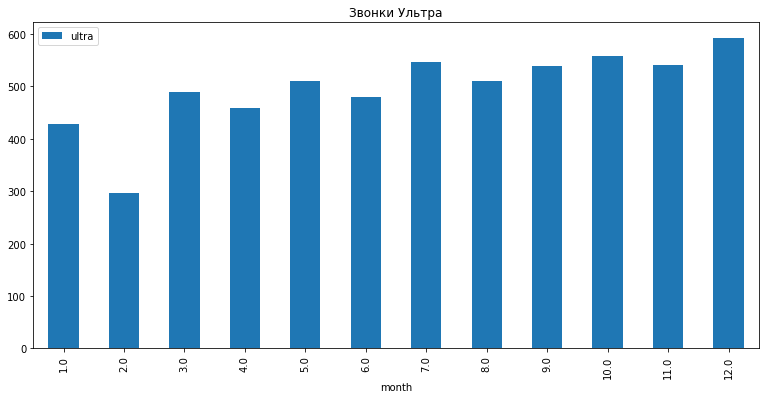

In [40]:
ax=mean_ultra.plot(y='calls',figsize=(13,6),style='o-',kind='bar',label='ultra')
plt.title('Звонки Ультра');

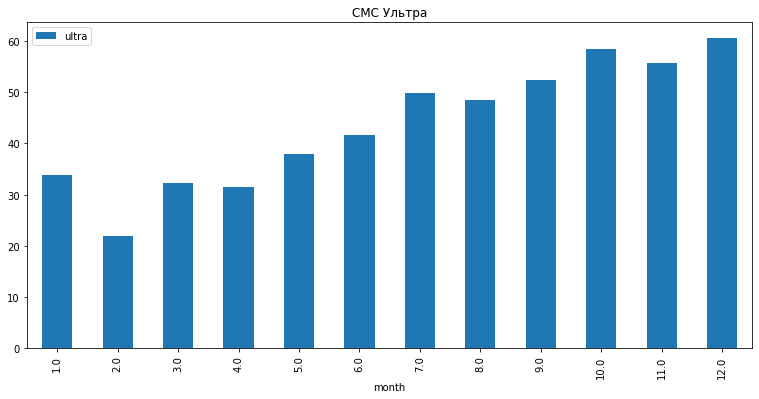

In [41]:
ax=mean_ultra.plot(y='sms',figsize=(13,6),style='o-',kind='bar',label='ultra')
plt.title('СМС Ультра');

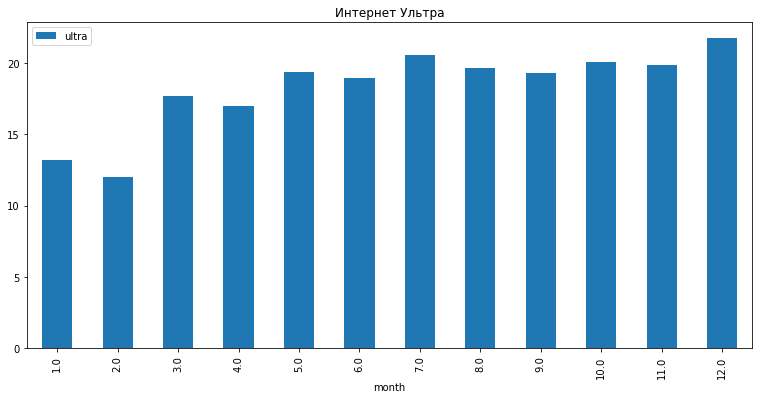

In [42]:
ax=mean_ultra.plot(y='traffic',figsize=(13,6),style='o-',kind='bar',label='ultra')
plt.title('Интернет Ультра');

Распределение по месяцам на всех трех графиках очень похоже: максимум активности пользователей по разговорам, СМС и использованию интернета приходится на предпразничный декабрь. Минимум - на февраль (но это самый короткий месяц в году). Некоторое различие наблюдается в отправке сообщений: в первом полугодии их меньше, чем во втором. По звонкам и интернету нет такого большого различия.

In [43]:
#среднее смарт
mean_smart=(data_final
     .query('tariff=="smart"')
     .pivot_table(index='month',values=('calls','sms','traffic', 'revenue'),aggfunc=('mean'))    
)
mean_smart

,calls,revenue,sms,traffic
month,,,,
1.0,203.852941,556.617647,18.235294,8.735294
2.0,298.689655,600.017241,24.086207,11.844828
3.0,390.051948,668.519481,31.857143,15.233766
4.0,367.133929,641.660714,30.741071,13.625000
5.0,387.361702,648.574468,33.773050,15.907801
6.0,395.640244,655.237805,33.402439,15.951220
7.0,408.353234,670.716418,33.751244,15.875622
8.0,421.468085,690.808511,33.638298,16.736170
9.0,428.611538,696.100000,33.638462,16.392308


Звонки и СМС в пределах лимита, а вот интернет у клиентов "Смарт" очень востребован: лимит превышен почти каждый месяц, кроме января, февраля и апреля.  Выручка  сильно превышает абонентскую плату.

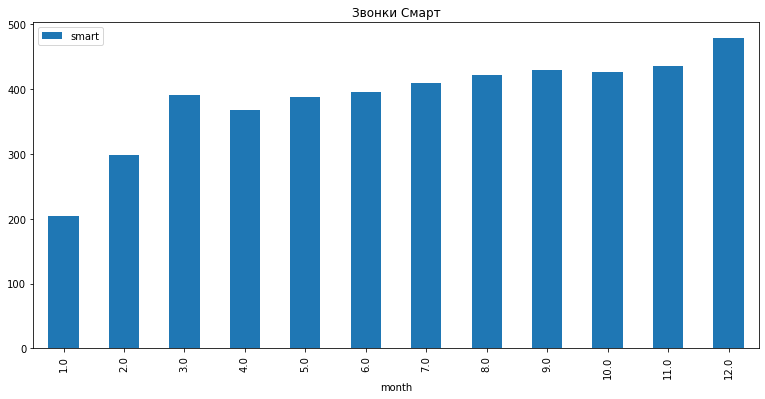

In [44]:
ax=mean_smart.plot(y='calls',figsize=(13,6),style='o-',kind='bar',label='smart')
plt.title('Звонки Смарт');

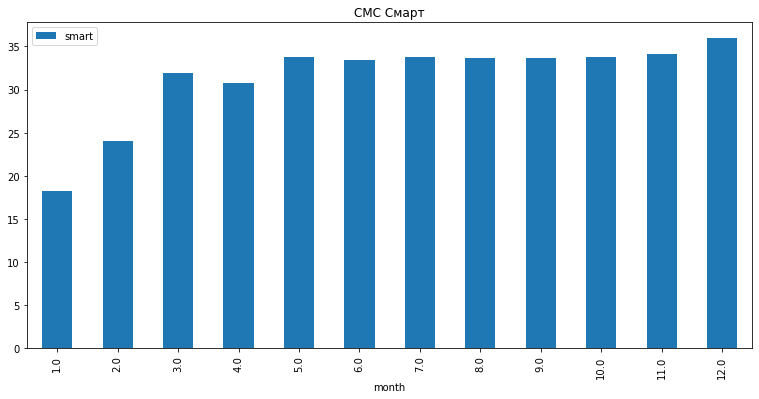

In [45]:
ax=mean_smart.plot(y='sms',figsize=(13,6),style='o-',kind='bar',label='smart')
plt.title('СМС Смарт');

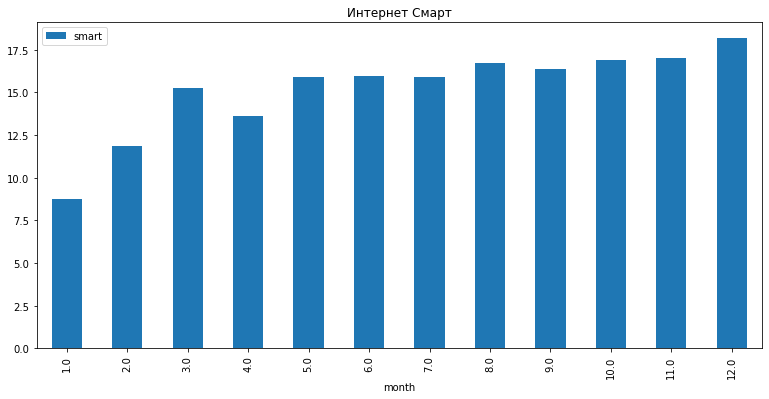

In [46]:
ax=mean_smart.plot(y='traffic',figsize=(13,6),style='o-',kind='bar',label='smart')
plt.title('Интернет Смарт');

По тарифу "Смарт" графики также очень похожи. Максимум в декабре, минимум в январе. СМС с марта по ноябрь распределены примерно одинаково. 

Сравним активность пользователей обоих тарифов с помощью графиков:

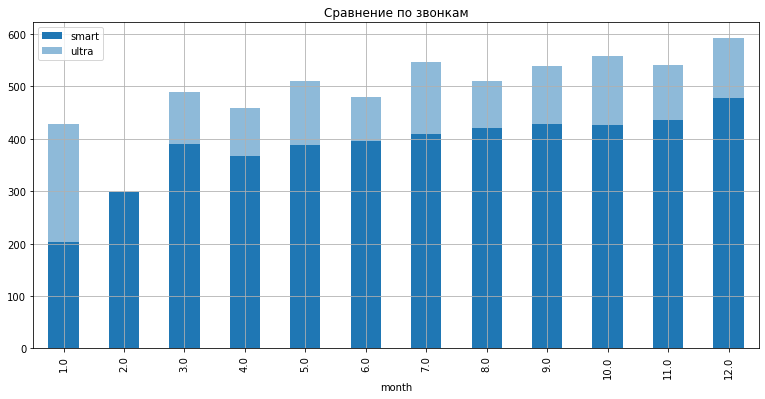

In [47]:
ax=mean_smart.plot(y='calls',figsize=(13,6),style='o-',kind='bar',label='smart')
mean_ultra.plot(y='calls',grid=True,figsize=(13,6),style='o-',kind='bar',label='ultra',alpha=0.5,ax=ax)
plt.title('Сравнение по звонкам');

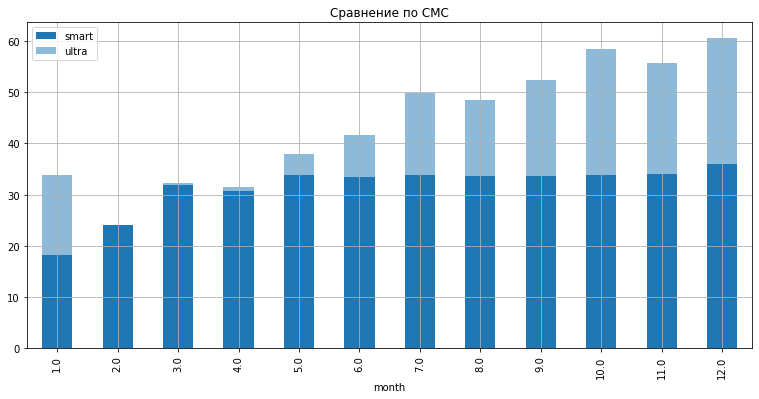

In [48]:
ax=mean_smart.plot(y='sms',grid=True,figsize=(13,6),style='o-',kind='bar',label='smart')
mean_ultra.plot(y='sms',grid=True,figsize=(13,6),style='o-',kind='bar',label='ultra',alpha=0.5,ax=ax)
plt.title('Сравнение по СМС');

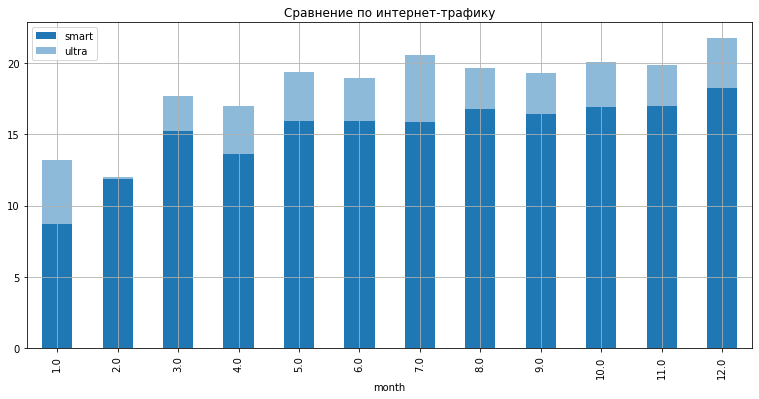

In [49]:
ax=mean_smart.plot(y='traffic',figsize=(13,6),style='o-',kind='bar',label='smart')
mean_ultra.plot(y='traffic',grid=True,figsize=(13,6),style='o-',kind='bar',label='ultra',alpha=0.5,ax=ax)
plt.title('Сравнение по интернет-трафику');

По графикам видно, что тариф "Ультра" лидирует по всем параметрам. Наибольшее различие составляет продолжительность звонков и отправка сообщений в январе: клиенты "Ультра" звонили и отправляли СМС примерно вдвое больше, чем пользователи "Смарт". 

Посчитаем дисперсию по тарифам:

In [50]:
ultra_calls_var = np.var(ultra_users['calls'])
print(f'Дисперсия продолжительности звонков "Ультра": {ultra_calls_var}')
smart_calls_var = np.var(smart_users['calls'])
print(f'Дисперсия продолжительности звонков "Смарт": {smart_calls_var}')

Дисперсия продолжительности звонков "Ультра": 100771.22361720214
Дисперсия продолжительности звонков "Смарт": 36203.066652094654


In [51]:
ultra_sms_var = np.var(ultra_users['sms'])
print(f'Дисперсия количества сообщений "Ультра": {ultra_sms_var}')
smart_sms_var = np.var(smart_users['sms'])
print(f'Дисперсия количества сообщений "Смарт": {smart_sms_var}')

Дисперсия количества сообщений "Ультра": 2282.946075394905
Дисперсия количества сообщений "Смарт": 796.4554829170846


In [52]:
ultra_internet_var = np.var(ultra_users['traffic'])
print(f'Дисперсия трафика "Ультра": {ultra_internet_var}')
smart_internet_var = np.var(smart_users['traffic'])
print(f'Дисперсия трафика "Смарт": {smart_internet_var}')

Дисперсия трафика "Ультра": 96.99311602978716
Дисперсия трафика "Смарт": 33.0138874548374


По данным тарифа "Ультра" дисперсия значительно выше, чем у "Смарт".

Посчитаем стандартное отклонение по тарифу "Ультра":

In [53]:
std_ultra_calls = np.std(ultra_users['calls'])
std_ultra_mes= np.std(ultra_users['sms'])
std_ultra_internet = np.std(ultra_users['traffic'])
print(f'СКО звонков "Ультра": {std_ultra_calls}')
print(f'СКО сообщений "Ультра": {std_ultra_mes}')
print(f'СКО интернет-трафика "Ультра": {std_ultra_internet}')

СКО звонков "Ультра": 317.4448355497411
СКО сообщений "Ультра": 47.78018496610185
СКО интернет-трафика "Ультра": 9.848508314957508


Посчитаем стандартное отклонение по тарифу "Смарт":

In [54]:
std_smart_calls = np.std(smart_users['calls'])
std_smart_mes= np.std(smart_users['sms'])
std_smart_internet = np.std(smart_users['traffic'])
print(f'СКО звонков "Смарт": {std_smart_calls}')
print(f'СКО сообщений "Смарт": {std_smart_mes}')
print(f'СКО интернет-трафика "Смарт": {std_smart_internet}')

СКО звонков "Смарт": 190.27103471651867
СКО сообщений "Смарт": 28.22154288689909
СКО интернет-трафика "Смарт": 5.745771267187496


Соответственно, стандартное отклонение данных по  тарифу "Ультра" выше, чем по тарифу "Смарт". Данные по "Ультра" характеризуются более сильным разбросом от среднего значения, чем у "Смарт". По всем параметрам (продолжительность звонков, количество смс, интернет) больше расходуют пользователи тарифа "Ультра".

Построим графики, чтобы посмотреть распределения:

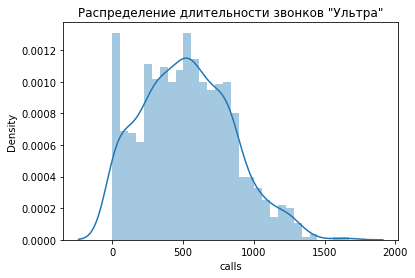

In [55]:
sns.distplot(ultra_users['calls'],bins=30)
plt.title('Распределение длительности звонков "Ультра"');

По гистограмме можно сделать вывод, что больше всего пользователи тарифа "Ультра" разговаривают около 1 мин.

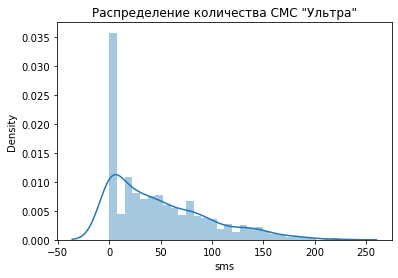

In [56]:
sns.distplot(ultra_users['sms'],bins=30)
plt.title('Распределение количества СМС "Ультра"');

Больше всего пользователи тарифа "Ультра" отправляют ок. 10 CМС.

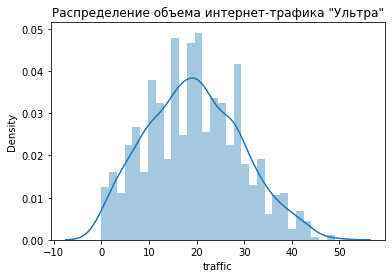

In [57]:
sns.distplot(ultra_users['traffic'],bins=30)
plt.title('Распределение объема интернет-трафика "Ультра"');

Больше всего пользователи тарифа "Ультра" используют ок. 22000 Мб (ок.22 Гб) интернета.

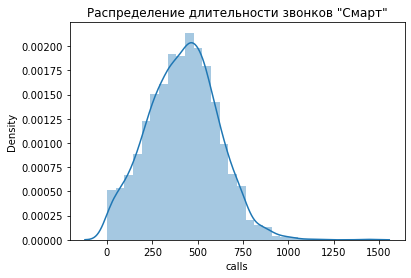

In [58]:
sns.distplot(smart_users['calls'],bins=30)
plt.title('Распределение длительности звонков "Смарт"');

По гистограмме можно сделать вывод, что больше всего пользователи тарифа "Смарт" разговаривают около 500 мин.

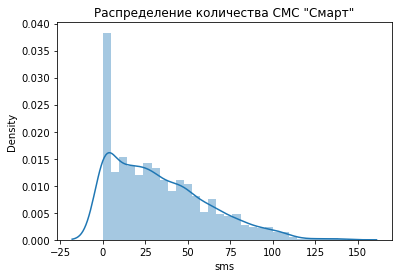

In [59]:
sns.distplot(smart_users['sms'],bins=30)
plt.title('Распределение количества СМС "Смарт"');

Больше всего пользователи тарифа "Смарт" отправляют ок. 5 CМС.

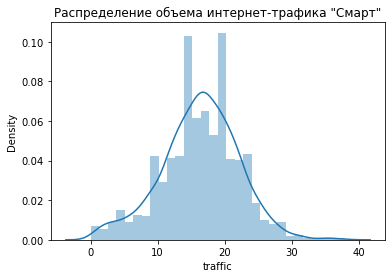

In [60]:
sns.distplot(smart_users['traffic'],bins=30)
plt.title('Распределение объема интернет-трафика "Смарт"');

Больше всего пользователи тарифа "Смарт" используют ок. 16000 Мб (ок. 16 Гб) интернета.

### Вывод

Пользователи "Смарт" меньше отправляют СМС и расходуют меньше интернет-трафика, при этом большинство клиентов превышает лимит. Средняя ежемесячная выручка с тарифа "Смарт" намного больше абонентской платы по нему. Активность пользователей обоих тарифов минимальная в начале года и максимальная в конце. Данные по пользователям тарифа "Ультра" имеют более высокую дисперсию и, соответственно, стандартное отклонение, чем данные по тарифу "Смарт", т.е. поведение пользователей тарифа "Ультра" менее предсказуемое с точки зрения потребления телекоммуникационных услуг.  

## Проверка гипотез

### Гипотеза 1

Нулевая гипотеза 1: средняя выручка пользователей тарифов "Ультра" и "Смарт" одинаковая. 

Альтернативная гипотеза 1: средняя выручка пользователей тарифа "Ультра" отличается от средней выручки пользователей тарифа "Смарт". 

In [61]:
#выборки для каждого тарифа:
ultra_revenue_mean = data_final.query('tariff =="ultra"')['revenue'].values 
smart_revenue_mean = data_final.query('tariff =="smart"')['revenue'].values

In [62]:
#проверим дисперсии:
print('Дисперсия smart_revenue_mean:',np.var(smart_revenue_mean))
print('Дисперсия ultra_revenue_mean:',np.var(ultra_revenue_mean))

Дисперсия smart_revenue_mean: 68100.67579146056
Дисперсия ultra_revenue_mean: 0.0


Видно, что дисперсии сильно отличаются. Поэтому для проведения t-теста укажем qual_var = False:

In [63]:
alpha = .05
results = st.ttest_ind(smart_revenue_mean, ultra_revenue_mean)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.0
Отвергаем нулевую гипотезу


Нулевая гипотеза отвергнута. Значит, средняя выручка пользователей двух тарифов различаются. Итак, Гипотеза 1 подтверждается.

### Гипотеза 2

Нулевая гипотеза 2: cредняя выручка клиентов из Москвы равна средней выручке клиентов из других регионов. 

Альтернативная гипотеза 2: средняя выручка клиентов из Москвы отличается от средней выручки клиентов из других регионов. 

In [64]:
#делаем выборки:
moscow_revenue_mean = data_final.query('city == "Москва"')['revenue'].values
other_revenue_mean = data_final.query('city != "Москва"')['revenue'].values

In [65]:
#проверим дисперсии:
print('Дисперсия moscow_revenue_mean:',np.var(moscow_revenue_mean))
print('Дисперсия other_revenue_mean:',np.var(other_revenue_mean))

Дисперсия moscow_revenue_mean: 410031.8230691549
Дисперсия other_revenue_mean: 375823.9848409199


Дисперсия не сильно отличается, поэтому не будем указывать qual_var = False:

In [66]:
alpha = .05
results = st.ttest_ind(moscow_revenue_mean, other_revenue_mean)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.0018497307474415955
Отвергаем нулевую гипотезу


Нулевая гипотеза не отвергнута. Значит, Гипотеза 2 НЕ подтверждается.

Для убедительности посмотрим средние значения:

In [67]:
print('Средняя выручка пользователей тарифа "Смарт":',smart_revenue_mean.mean())
print('Средняя выручка пользователей тарифа "Ультра":', ultra_revenue_mean.mean())
print('Средняя выручка клентов из Москвы:', moscow_revenue_mean.mean())
print('Средняя выручка клентов из других регионов:', other_revenue_mean.mean())

Средняя выручка пользователей тарифа "Смарт": 692.2166890982503
Средняя выручка пользователей тарифа "Ультра": 1950.0
Средняя выручка клентов из Москвы: 1147.859247135843
Средняя выручка клентов из других регионов: 1061.2212831348445


Видно, что средняя выручка "Ультра" заметно выше "Смарт", а вот региональные различия незначительные. 

## Вывод

- Данные преимущественно в хорошем состоянии. Изменены только типы в столбцах с датами на datetime64. Посчитан помесячный объем звонков, СМС и интернет-трафика, рассчитана выручка с каждого пользователя. Подготовлена таблица для последующего анализа.Проверены гипотезы.
- В процессе анализа выявлено:
1) "Смарт" за год принес больше выручки из-за большего числа абонентов.
2) Активность пользователей растет в течение года.
3) Все клиенты в среднем держатся в рамках лимита, кроме пользователей "Смарт", которым обычно не хватает 15 Гб в месяц. 
4) Средняя выручка не зависит от региона проживания клиентов. 
5) Средняя месячная выручка с тарифа "Ультра" выше, чем с тарифа "Смарт".
- Тариф "Ультра" более перспективный для оператора с точки зрения прибыльности, поэтому лучше скорректировать рекламный бюджет в сторону "Ультра".